In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../../Code/')
from utils import read_dataset_log
from scipy.stats import ranksums
import os

In [2]:
from matplotlib import rcParams, font_manager
import matplotlib

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [3]:
figdir = '../../Figures/Components/'

In [4]:
cgepinfo = read_dataset_log(tabname='cGEP Paths').loc[0,:]
cgepinfo

clustering_fn                                /data/srlab1/TCAT/Data/TCAT/cluster_groups.pai...
clustering_with_singletons_fn                /data/srlab1/TCAT/Data/TCAT/cluster_groups.pai...
merged_hvgs                                  /data/srlab1/TCAT/Data/TCAT/MergedHVG_UnionAll...
reference_fn                                 /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
renamed_ref_fn                               /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_varnorm_spectra                          /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_varnorm_spectra_withsingletons           /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_renorm_varnorm_spectra                   /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_renorm_varnorm_spectra_withsingletons    /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
scores_spectra                               /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
scores_spectra_withsingletons                /data

In [5]:
gep_info = read_dataset_log('cGEP_Name')
gep_info.index = gep_info['cGep_Name']
gep_info.head()

,cGep_Name,Old_Short_Name,Long_Name,Short_Name,Shortest_Name,Class,Num_Datasets,Notes,Reviewed,Filter
cGep_Name,,,,,,,,,,
COMBAT_Cytoskeleton,COMBAT_Cytoskeleton,Cytoskeleton,Actin Cytoskeleton,Cytoskeleton,Cytosk.,Functional,7,NaN,Y,NaN
CD8_EM,CD8_EM,CD8-EM,CD8 Effector Memory,CD8-EM,CD8-EM,Lineage,7,Need to confirm overlap with gating since the ...,Y,NaN
CellCycle-G2M,CellCycle-G2M,CellCycle-G2M,Cell Cycle G2M Phase,CellCycle-G2M,G2M-phase,Functional,7,NaN,Y,NaN
CellCycle-S,CellCycle-S,CellCycle-S,Cell Cycle S Phase,CellCycle-S,S-phase,Functional,7,NaN,Y,NaN
Cytotoxic,Cytotoxic,Cytotoxic,Cytotoxic,Cytotoxic,Cytotoxic,Functional,7,NaN,Y,NaN


In [6]:
scores = pd.read_csv(cgepinfo.loc['scores_spectra'], sep='\t', index_col=0)
scores.head()

,ABCG1,C11orf70,RAB26,HGS,REG3A,SLC13A4,PGAM1,MIF4GD,OLA1,UBXN8,...,C4orf19,TBX3,MAGI3,TMCC3,LGALS14,NAT2,CNOT1,LTA,LARP1,TMEM176A
CellCycle-G2M,-0.000057,0.000005,-0.000011,-0.000003,0.000008,0.000009,-0.000185,0.000029,-0.000065,-0.000046,...,1.321860e-05,0.000004,0.000111,0.000009,0.000042,0.000006,0.000060,-0.000047,0.000004,0.000013
CD4-Naive_Translation,-0.000870,NaN,-0.000027,-0.001012,-0.000128,-0.000040,-0.001060,-0.000008,0.000122,-0.000214,...,3.999810e-07,-0.000078,-0.000373,-0.000228,0.000313,0.000014,-0.001340,-0.000410,-0.000855,-0.000220
HLA,0.000152,0.000026,0.000080,-0.000124,-0.000160,-0.000042,0.000104,0.000288,0.000523,-0.000070,...,-1.099922e-04,0.000090,-0.000214,-0.000708,-0.000048,-0.000056,-0.000082,-0.000140,-0.000085,0.000146
ISG,-0.000130,-0.000058,-0.000020,0.000124,-0.000085,-0.000005,0.000618,-0.000091,-0.000148,0.000046,...,-3.926008e-05,-0.000014,0.000115,-0.000092,-0.000050,-0.000042,0.000030,0.001110,-0.000045,-0.000039
MALAT1_Mito,0.000570,NaN,0.000155,0.000812,-0.001028,0.000210,-0.002809,-0.001470,-0.001741,0.000270,...,-4.286240e-05,-0.000063,0.000332,0.000004,-0.000353,-0.000102,0.000027,-0.000927,0.000588,-0.000002


In [7]:
scores.shape

(52, 20617)

In [8]:
rename_map = dict(zip(gep_info['cGep_Name'], gep_info['Short_Name']))

In [9]:
scores_ren = scores.rename(index=rename_map)

In [10]:
scores_ren.head()

,ABCG1,C11orf70,RAB26,HGS,REG3A,SLC13A4,PGAM1,MIF4GD,OLA1,UBXN8,...,C4orf19,TBX3,MAGI3,TMCC3,LGALS14,NAT2,CNOT1,LTA,LARP1,TMEM176A
CellCycle-G2M,-0.000057,0.000005,-0.000011,-0.000003,0.000008,0.000009,-0.000185,0.000029,-0.000065,-0.000046,...,1.321860e-05,0.000004,0.000111,0.000009,0.000042,0.000006,0.000060,-0.000047,0.000004,0.000013
Translation,-0.000870,NaN,-0.000027,-0.001012,-0.000128,-0.000040,-0.001060,-0.000008,0.000122,-0.000214,...,3.999810e-07,-0.000078,-0.000373,-0.000228,0.000313,0.000014,-0.001340,-0.000410,-0.000855,-0.000220
HLA,0.000152,0.000026,0.000080,-0.000124,-0.000160,-0.000042,0.000104,0.000288,0.000523,-0.000070,...,-1.099922e-04,0.000090,-0.000214,-0.000708,-0.000048,-0.000056,-0.000082,-0.000140,-0.000085,0.000146
ISG,-0.000130,-0.000058,-0.000020,0.000124,-0.000085,-0.000005,0.000618,-0.000091,-0.000148,0.000046,...,-3.926008e-05,-0.000014,0.000115,-0.000092,-0.000050,-0.000042,0.000030,0.001110,-0.000045,-0.000039
Mito,0.000570,NaN,0.000155,0.000812,-0.001028,0.000210,-0.002809,-0.001470,-0.001741,0.000270,...,-4.286240e-05,-0.000063,0.000332,0.000004,-0.000353,-0.000102,0.000027,-0.000927,0.000588,-0.000002


In [11]:
geporder = []
for g in ['Lineage', 'Functional','Artifact',  'Doublet Lineage']:
    geporder += list(gep_info.loc[(gep_info['Class']==g) & (gep_info['Filter']!='F'), 'Short_Name'].sort_values())

scores_ren = scores_ren.loc[geporder,:]



In [12]:
top_genes = {}
for i in scores_ren.index:
    top_genes[i] = list(scores_ren.loc[i,:].sort_values(ascending=False).index[:20])

In [30]:
for g in top_genes.keys():
    print(g+'\t'+', '.join(top_genes[g][:20]))

CD4-CM	LIMS1, PASK, ITM2A, CORO1B, AB_CD278, TMSB4X, AB_CD126, AB_CD279, FYB1, AB_CD45RO, AB_CD109, AB_CD95, AB_CD28, KLRB1, TBC1D4, MAF, ARID5B, AQP3, TRIB2, RNASET2
CD4-Naive	CCR7, SELL, LEF1, AB_CD27-2, TCF7, ACTN1, AB_CD27-1, RPS13, AB_GP130, AB_CD109, GLTSCR2, FHIT, NOSIP, TXK, RPS3A, CHRM3-AS2, FAM65B, AB_CD7, RPL32, RPS8
CD8-EM	CMC1, GZMK, AB_CD244, CST7, CCL5, AB_TIGIT, EOMES, CD8A, AB_CD8a, CD8B, AB_KLRG1_MAFA, GZMM, SH2D1A, AB_CD8, DUSP2, DTHD1, KLRG1, CRTAM, LYST, CD160
CD8-Naive	LINC02446, CD8B, AB_CD8, S100B, NELL2, AB_CD8a, AB_CD73, AB_CD45RA, YBX3, CD248, REG4, ACTN1, AB_CD55, AIF1, NT5E, CLEC11A, CD8A, AB_CD314, LEF1, CCR7
CD8-Trm	LINC02446, ZNF683, AB_CD8a, CD8B, CD8A, HOPX, ITGA1, KLRC1, KLRC2, CCL5, CD7, LINC01871, AB_CD244, XCL1, CTSW, CD63, KLRD1, CLIC3, CD9, CD52
MAIT	SLC4A10, AB_TCR-V-7.2, KLRB1, NCR3, AB_CD161, CEBPD, AB_CD26, AB_CD195, IL23R, LTK, TLE1, CA2, ME1, AB_CD26-2, RORC, IL4I1, PRSS35, TRAV1-2, ZBTB16, CXCR6
TEMRA	KIR2DL3, KLRC2, TYROBP, KIR3DL2, KLRC3

In [13]:
top_genes_forsummary = top_genes.copy()
top_genes_forsummary['CD4-Naive'] = ['CCR7', 'SELL', 'LEF1', 'TCF7']
top_genes_forsummary['Th2-Resting'] = ['PTGDR2', 'GATA3', 'CCR4', 'PTGER2']
top_genes_forsummary['MAIT'] = ['SLC4A10', 'AB_TCR-V-7.2', 'AB_CD161', 'IL23R']
top_genes_forsummary['CellCycle-S'] = ['TK1', 'TYMS', 'E2F1', 'PCNA']
top_genes_forsummary['Th17-Resting'] = ['CCR6', 'RORC', 'PTPN13', 'PDE4D']
top_genes_forsummary['Th17-Activated'] = ['IL26', 'IL17A', 'IL17F', 'IL22']
top_genes_forsummary['Tfh-2'] = ['CD200', 'CXCR5', 'CXCL13', 'IL21']
top_genes_forsummary['Tfh-1'] = ['TOX2', 'CXCR5', 'CXCL13', 'IL6ST']

In [46]:
scores_ren.loc['Th17-Activated', :].sort_values(ascending=False).dropna().head(50)

IL26             0.031135
IL17A            0.023927
NMU              0.017939
CREB3L3          0.014416
COL5A3           0.014335
IL17F            0.011673
PKHD1            0.009635
C2CD4B           0.008852
CTSH             0.008610
ADAM12           0.008594
IL22             0.007314
RORC             0.005688
LCN6             0.005299
AB_CD71          0.005186
PTPRD            0.005074
SMCO4            0.004795
AB_CD146         0.004648
PTPN13           0.004604
TMPRSS3          0.004522
CA10             0.004334
GPR25            0.003950
S100P            0.003922
NTRK2            0.003862
MCAM             0.003616
C9orf139         0.003510
LRP12            0.003496
IL1R2            0.003417
TMEM167A         0.003270
CCR9             0.003168
S100A6           0.003075
OSTF1            0.003060
CCL20            0.003026
AB_CD28          0.003023
HPGD             0.003007
TMIGD2           0.002830
LIMS1            0.002803
PRR5             0.002646
AB_Integrin-7    0.002577
FURIN       

In [47]:
scores_ren.loc['CellCycle-S', :].sort_values(ascending=False).dropna().head(50)

GINS2       0.007902
TK1         0.007777
TYMS        0.007721
DTL         0.007395
UHRF1       0.007211
PCLAF       0.007147
CLSPN       0.007088
CDC45       0.007052
MCM10       0.006897
FAM111B     0.006855
CDT1        0.006624
CDC6        0.005988
E2F1        0.005765
PCNA        0.005552
RRM2        0.005464
MCM4        0.005438
ASF1B       0.005116
MCM2        0.005112
CENPU       0.005082
STMN1       0.005052
MCM7        0.004857
DUT         0.004610
PKMYT1      0.004605
MYBL2       0.004593
MCM5        0.004532
ZWINT       0.004446
CHEK1       0.004328
DHFR        0.004202
HELLS       0.004180
FEN1        0.003989
MCM3        0.003857
BRCA1       0.003821
CDCA7       0.003804
EXO1        0.003427
MCM6        0.003422
ORC6        0.003252
PAQR4       0.003163
TUBA1B      0.003124
C16orf59    0.003115
RAD51AP1    0.003093
DSCC1       0.003059
ORC1        0.003001
CDCA5       0.002952
RAD51       0.002922
CENPM       0.002921
ESCO2       0.002848
MND1        0.002844
CHAF1A      0

In [35]:
toshow_main = ['CD4-Naive', 'Treg', 'gdT', 'MAIT', 'Th17-Resting', 'Th17-Activated', 'Th2-Resting', 'Tfh-1', 'CellCycle-S', 'Multi-Cytokine', 'Exhaustion', 'Cytotoxic']
ngenes_per = 4
genes = []
for g in toshow_main:
    genes += top_genes_forsummary[g][:ngenes_per]

In [36]:
7.8/14*12

6.685714285714286

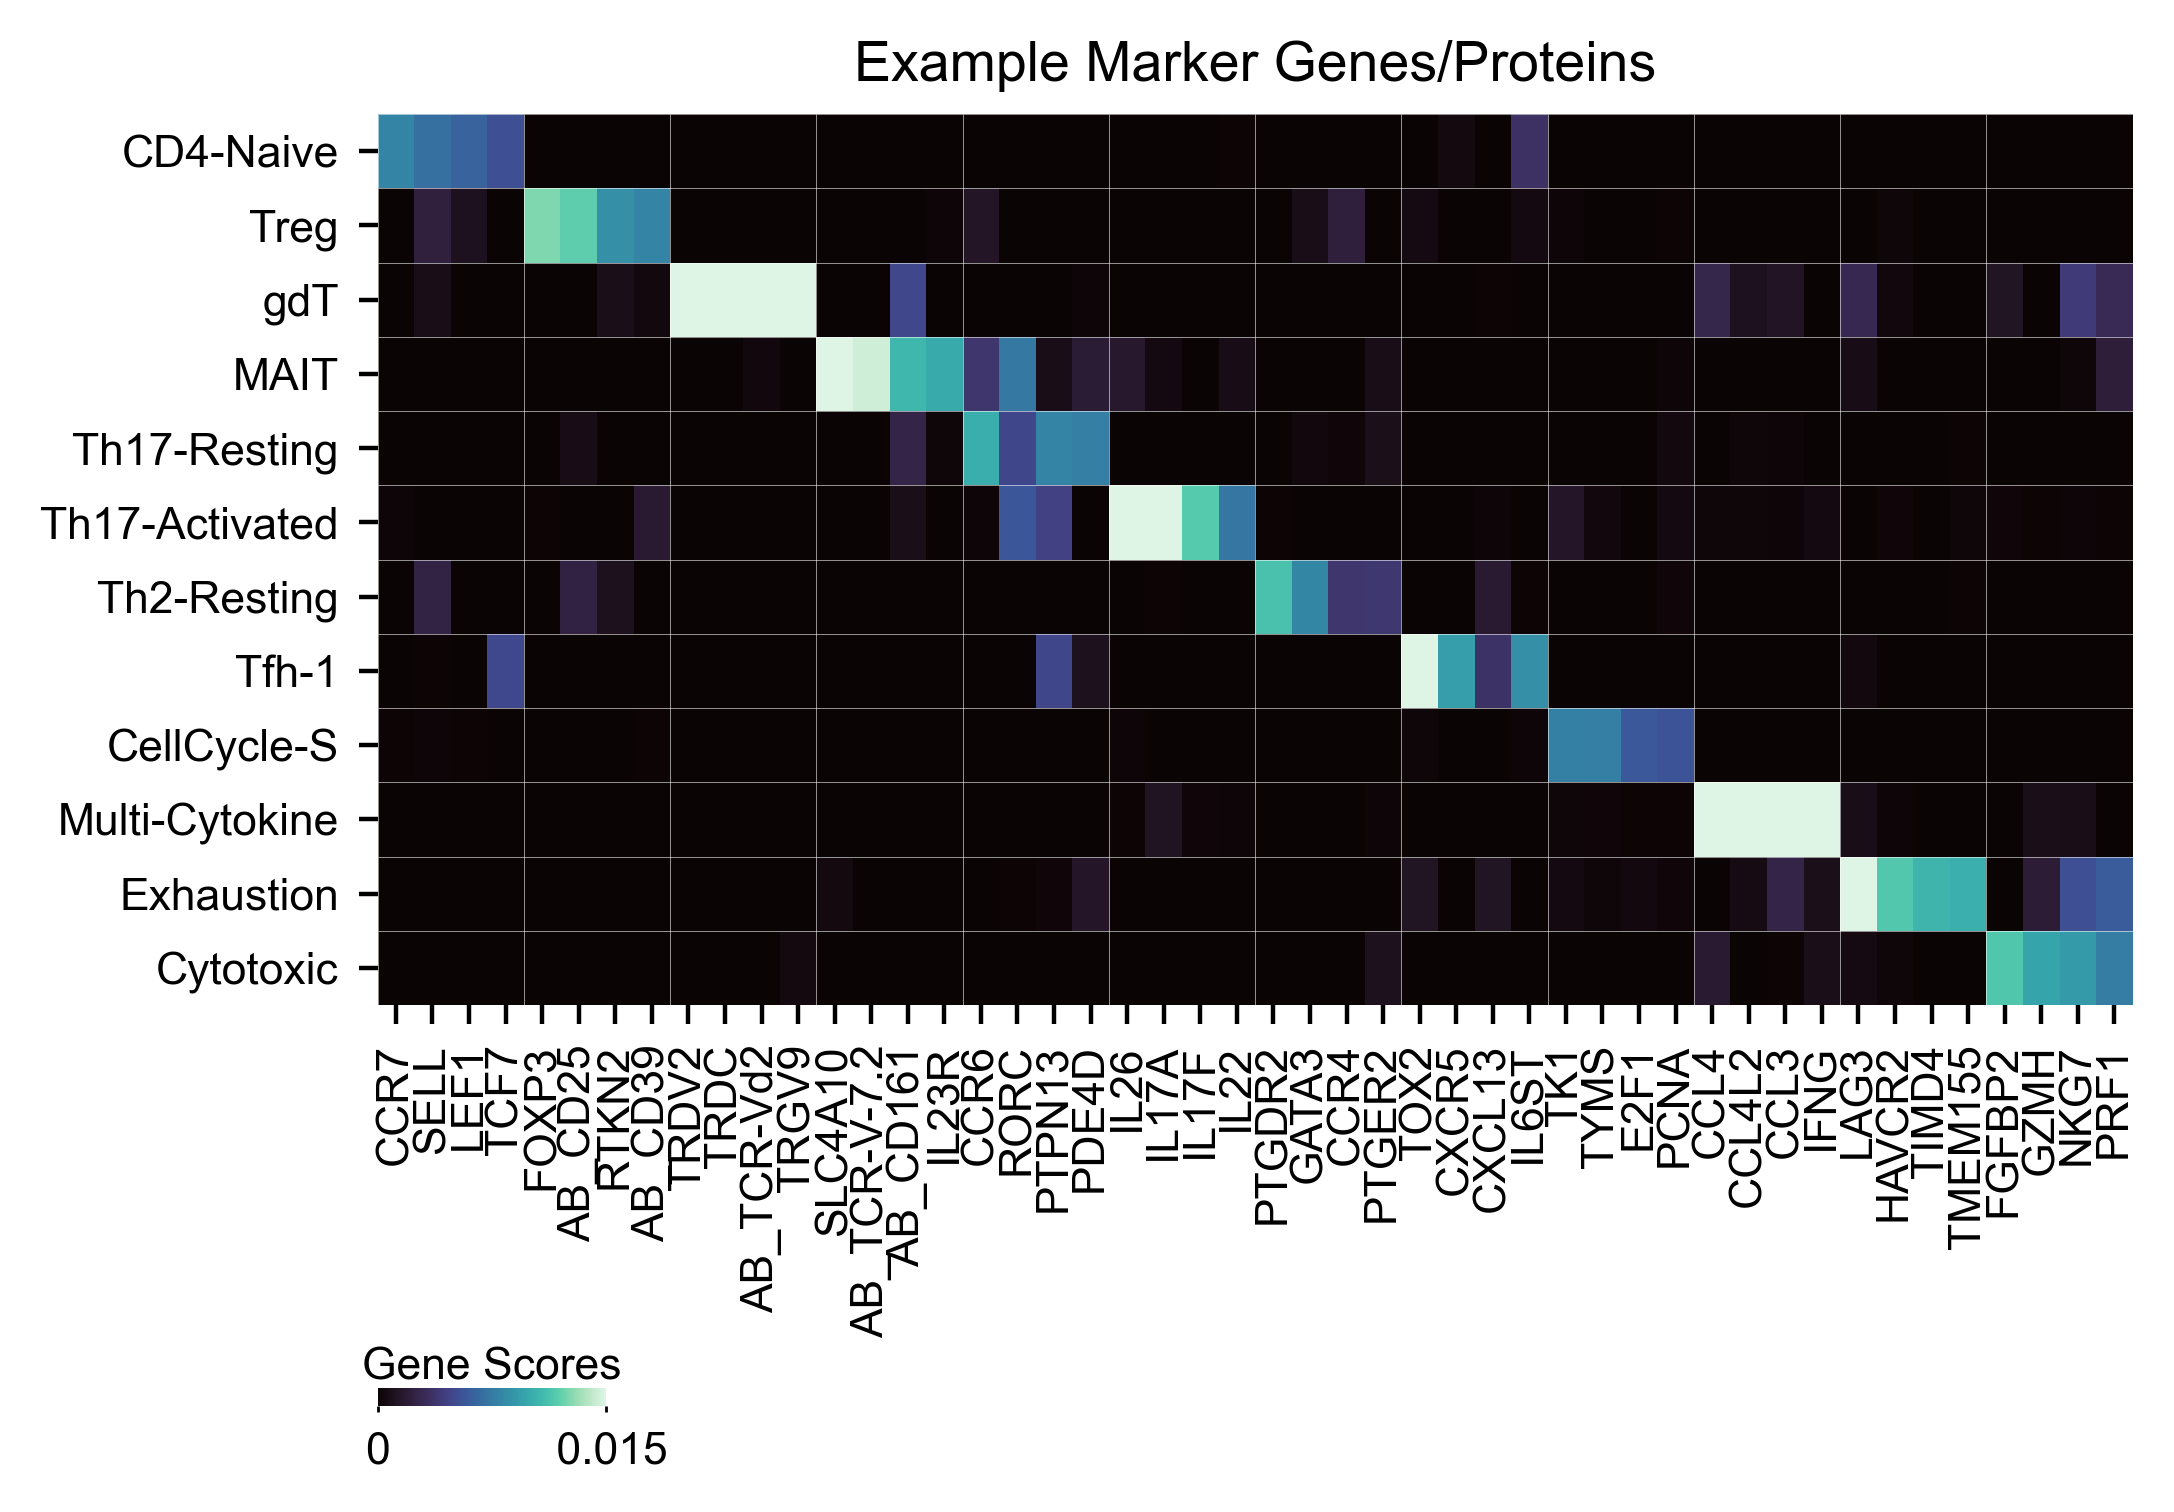

In [41]:
vmax = .015
(fig,ax) = plt.subplots(1,1, figsize=(6.75, 2.75), dpi=400, gridspec_kw={'left':.3, 'bottom':.14, 'right':.95, 'top':.95})
cbar_ax = ax.inset_axes([-0, -.45, 0.13, 0.02], transform=ax.transAxes, xticks=[0, vmax])

Z = scores_ren.loc[toshow_main, genes].T
Z.values[Z>vmax] = vmax
Z = Z.replace(np.nan, 0)

sns.heatmap(Z.T, ax=ax, vmin=0, vmax=vmax, cmap='mako',
            cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal", 'ticks':[0, vmax]}, xticklabels=False, yticklabels=False)

_ = ax.set_yticks(np.arange(len(toshow_main))+.5)
_ = ax.set_yticklabels(toshow_main, fontsize=8, rotation=0)

_ = ax.set_xticks(np.arange(len(genes))+.5)
_ = ax.set_xticklabels(genes, fontsize=8, rotation = 90)

#cbar_ax.set_xticks([0,vmax])
cbar_ax.set_xticklabels(['0', ' %.3f' % vmax])
cbar_ax.tick_params(labelsize=8, length=1, width=.5)
cbar_ax.set_title('Gene Scores', fontsize=8, pad=-3)

ax.set_title('Example Marker Genes/Proteins', fontsize=10)

for i in np.arange(0, len(genes), ngenes_per):
    ax.vlines(x=i, ymin=0, ymax=len(toshow_main), color='w', linewidth=.1)


for i in np.arange(len(toshow_main)):
    ax.hlines(y=i, xmin=0, xmax=len(genes), color='w', linewidth=.1)

plt.savefig(os.path.join(figdir, 'MarkerGenes_Examples.pdf'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'MarkerGenes_Examples.png'), bbox_inches="tight")

In [49]:
toshow_main = ['CD4-Naive', 'Treg', 'gdT', 'MAIT', 'Th17-Activated', 'Th2-Resting', 'CellCycle-S',  'ISG',  'Cytotoxic']
ngenes_per = 4
genes = []
for g in toshow_main:
    genes += top_genes_forsummary[g][:ngenes_per]

In [50]:
scores_ren.loc['Exhaustion', :].sort_values(ascending=False).head(20)

LAG3       0.015567
HAVCR2     0.011573
TIMD4      0.010531
TMEM155    0.010307
PTMS       0.008562
GZMB       0.008042
CADM1      0.006888
SLC27A2    0.006356
CD27       0.006277
CD38       0.006262
VCAM1      0.005984
PRF1       0.005955
GZMA       0.005757
RAB38      0.005493
NKG7       0.005296
CD200R1    0.005185
TSC22D1    0.005036
APBB2      0.005002
RDH10      0.004955
SEMA4A     0.004910
Name: Exhaustion, dtype: float64

In [51]:
scores_ren

,ABCG1,C11orf70,RAB26,HGS,REG3A,SLC13A4,PGAM1,MIF4GD,OLA1,UBXN8,...,C4orf19,TBX3,MAGI3,TMCC3,LGALS14,NAT2,CNOT1,LTA,LARP1,TMEM176A
CD4-CM,0.000221,NaN,-0.000007,0.000082,NaN,-1.466285e-05,0.000512,0.000272,0.000592,-0.000108,...,-6.014257e-05,-1.719109e-06,-0.000074,-0.000201,-0.000001,NaN,5.671976e-05,-0.000080,0.000008,-0.000045
CD4-Naive,-0.000056,-7.234874e-05,-0.000093,-0.000177,-0.000031,-3.914819e-06,-0.001153,-0.000203,0.000193,-0.000034,...,-5.360324e-05,-4.471190e-05,0.000139,-0.000427,0.000441,-1.674347e-05,-1.956656e-04,0.000096,0.000018,-0.000051
CD8-EM,0.000109,-3.608602e-05,0.000017,0.000023,-0.000015,-2.504611e-05,0.000234,0.000528,-0.000117,0.000148,...,-3.115786e-05,-7.226793e-05,-0.000460,-0.000034,-0.000091,-8.366902e-05,2.508631e-04,-0.000364,-0.000150,-0.000068
CD8-Naive,0.000322,NaN,0.000016,-0.000120,-0.000017,3.095104e-05,-0.000548,0.000117,0.000447,0.000121,...,-8.674806e-05,-2.586697e-05,-0.000242,-0.000458,-0.000187,4.969617e-07,6.770291e-05,0.000402,0.000149,-0.000009
CD8-Trm,0.000475,-4.918437e-05,-0.000076,-0.000022,NaN,3.181788e-06,0.000073,0.000381,0.000410,0.000076,...,-1.042195e-05,-4.006252e-05,-0.000098,0.000194,0.000001,NaN,6.994728e-06,-0.000232,-0.000017,-0.000120
MAIT,0.000101,-4.297388e-05,-0.000004,-0.000094,-0.000112,-7.821844e-06,0.000006,0.000249,0.000193,0.000093,...,-3.463752e-05,-6.043111e-06,0.000066,0.000114,-0.000075,1.020843e-04,4.144663e-05,0.000693,-0.000003,-0.000125
TEMRA,0.000079,-1.704554e-05,-0.000061,0.000186,0.000002,-2.346642e-06,0.000252,0.000403,0.000051,0.000116,...,-4.394741e-05,-2.275995e-05,-0.000181,0.000226,-0.000018,1.340514e-05,1.019299e-04,-0.000097,-0.000117,0.000041
Tfh-1,-0.000301,-2.179138e-05,0.000220,0.000170,NaN,1.957383e-06,0.000919,0.000357,0.000319,NaN,...,1.708251e-05,-2.348156e-05,-0.000227,-0.000261,NaN,NaN,-6.182446e-05,0.000344,0.000182,-0.000199
Tfh-2,-0.000093,-1.271612e-05,0.000045,0.000311,-0.000077,4.765839e-05,0.001480,0.000083,0.000389,-0.000021,...,-3.127062e-05,-2.826932e-05,-0.000086,-0.000116,0.000094,-3.493277e-05,1.550838e-04,-0.000028,0.000092,-0.000016
Th1-Like,0.000198,NaN,0.000039,0.000083,NaN,1.539537e-05,0.000499,0.000156,-0.000124,-0.000150,...,9.567974e-05,-3.673377e-05,0.000097,0.000152,-0.000181,NaN,7.672791e-06,-0.000263,-0.000112,0.000054


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

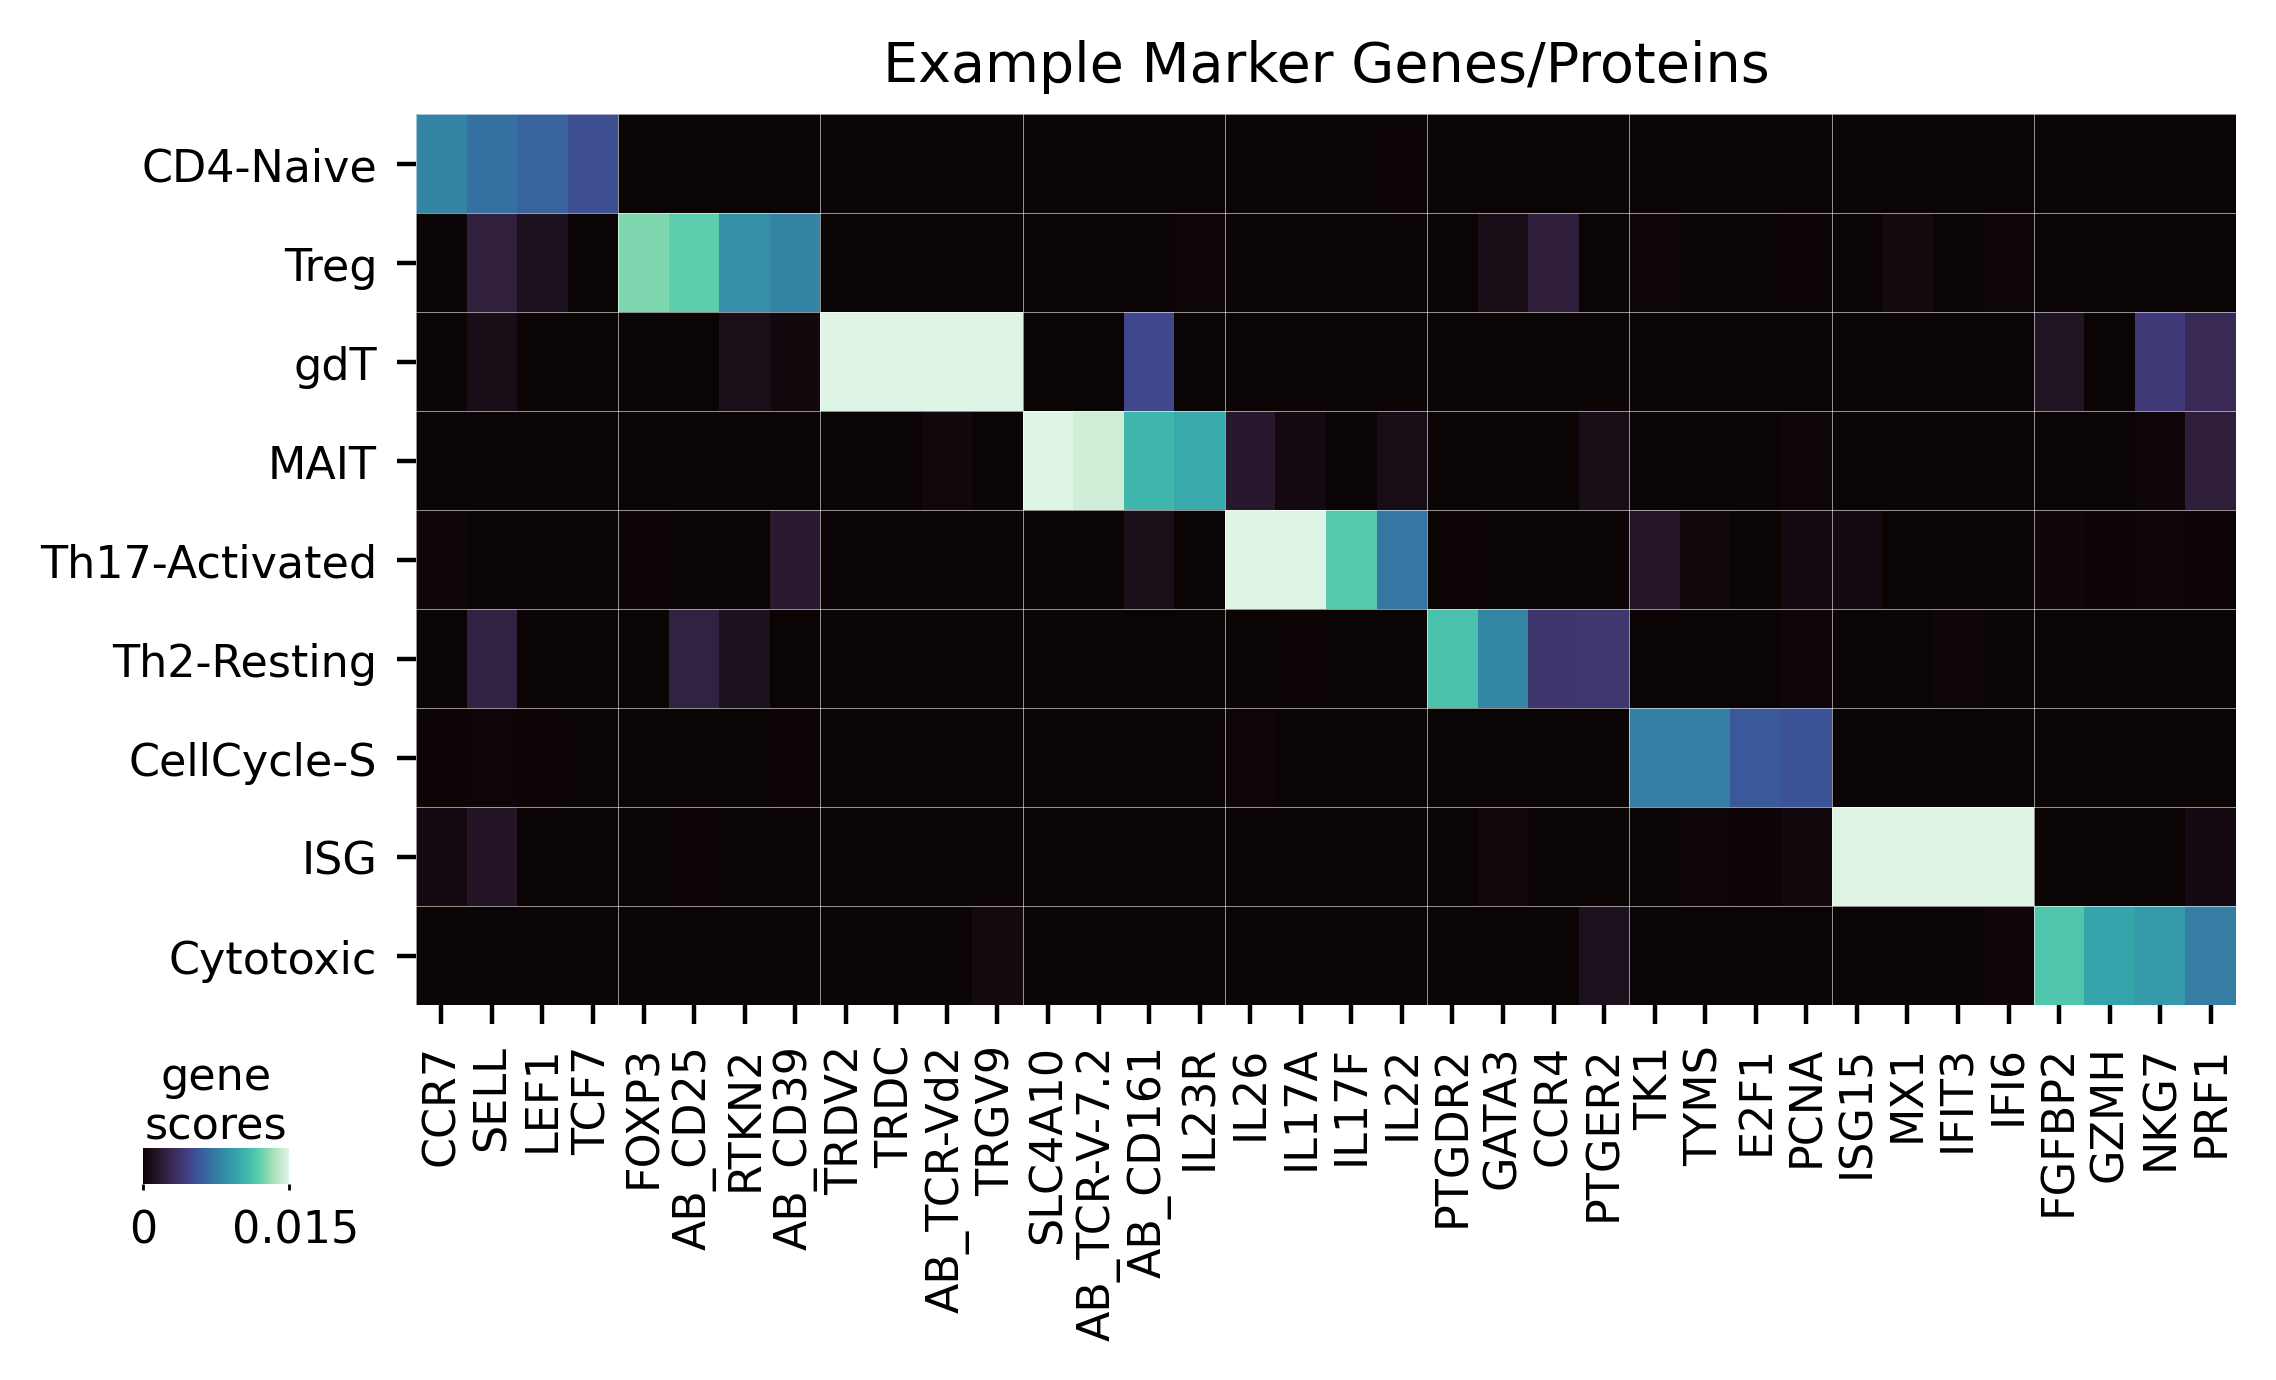

In [52]:
vmax = .015
(fig,ax) = plt.subplots(1,1, figsize=(7, 2.75), dpi=400, gridspec_kw={'left':.3, 'bottom':.14, 'right':.95, 'top':.95})
cbar_ax = ax.inset_axes([-.15, -.2, 0.08, 0.04], transform=ax.transAxes, xticks=[0, vmax])


Z = scores_ren.loc[toshow_main, genes].replace(np.nan, 0)
Z.values[Z>vmax] = vmax

sns.heatmap(Z, ax=ax, vmin=0, vmax=vmax, cmap='mako',
            cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal", 'ticks':[0, vmax]}, xticklabels=False, yticklabels=False)




_ = ax.set_yticks(np.arange(len(toshow_main))+.5)
_ = ax.set_yticklabels(toshow_main, fontsize=8)

_ = ax.set_xticks(np.arange(len(genes))+.5)
_ = ax.set_xticklabels(genes, fontsize=8, rotation=90)



#cbar_ax.set_xticks([0,vmax])
cbar_ax.set_xticklabels(['0', ' %.3f' % vmax])
cbar_ax.tick_params(labelsize=8, length=1, width=.5)
cbar_ax.set_title('gene\nscores', fontsize=8, pad=-3)

ax.set_title('Example Marker Genes/Proteins', fontsize=10)



for i in np.arange(0, len(genes), ngenes_per):
    ax.vlines(x=i, ymin=0, ymax=len(toshow_main), color='w', linewidth=.1)


for i in np.arange(len(toshow_main)):
    ax.hlines(y=i, xmin=0, xmax=len(genes), color='w', linewidth=.1)

plt.savefig(os.path.join(figdir, 'MarkerGenes_Examples_transposed.pdf'))
plt.savefig(os.path.join(figdir, 'MarkerGenes_Examples_transposed.png'))

In [20]:
full_gene_order = []
for g in geporder:
    order = top_genes_forsummary[g]
    numadded = 0
    i = 0
    while numadded<3:
        if order[i] not in full_gene_order:
            full_gene_order.append(order[i])
            numadded += 1
            
        i+=1
            

In [21]:
len(full_gene_order), len(geporder)*3

(156, 156)

In [22]:
shorten_map = dict(zip(gep_info['Short_Name'], gep_info['Shortest_Name']))

In [23]:
scores_ren_clean = scores_ren.loc[geporder, full_gene_order].replace(np.nan, 0).rename(index=shorten_map)
scores_ren_clean.head()

,LIMS1,PASK,ITM2A,CCR7,SELL,LEF1,CMC1,GZMK,AB_CD244,LINC02446,...,LYZ,JCHAIN,IGKC,IGKV3-20,PPBP,NRGN,TREML1,HBA2,HBA1,HBB
CD4-CM,0.007113,0.005415,0.004582,-0.000068,0.001180,0.000633,-0.000109,-0.000579,-0.000779,-0.000215,...,-0.000082,-0.000173,-0.000170,-0.000173,-0.000130,-0.000078,-0.000087,-0.000054,-0.000066,-0.000064
CD4-Naive,-0.000032,0.002515,-0.000372,0.007973,0.006960,0.006282,-0.000807,-0.001291,-0.001313,-0.000575,...,-0.000580,-0.000401,-0.000666,-0.000338,-0.000122,-0.000120,-0.000122,-0.000137,-0.000157,-0.000123
CD8-EM,-0.000468,-0.000251,0.001691,-0.001156,-0.001114,-0.001687,0.011686,0.009678,0.007998,0.000014,...,-0.000243,-0.000404,-0.000282,-0.000363,-0.000006,-0.000141,-0.000040,-0.000149,-0.000084,-0.000088
CD8-Naive,-0.001386,0.003322,-0.001221,0.004049,0.003357,0.004118,-0.000681,-0.000871,-0.000791,0.012476,...,-0.000728,-0.000358,-0.000298,-0.000272,-0.000219,-0.000141,-0.000142,-0.000263,-0.000253,-0.000203
CD8-Trm,-0.001280,-0.000414,-0.000998,-0.001154,-0.001038,-0.000288,-0.002263,-0.001975,0.005496,0.016947,...,-0.000189,-0.000109,-0.000543,-0.000071,0.000032,0.000002,0.000044,-0.000012,0.000005,-0.000012


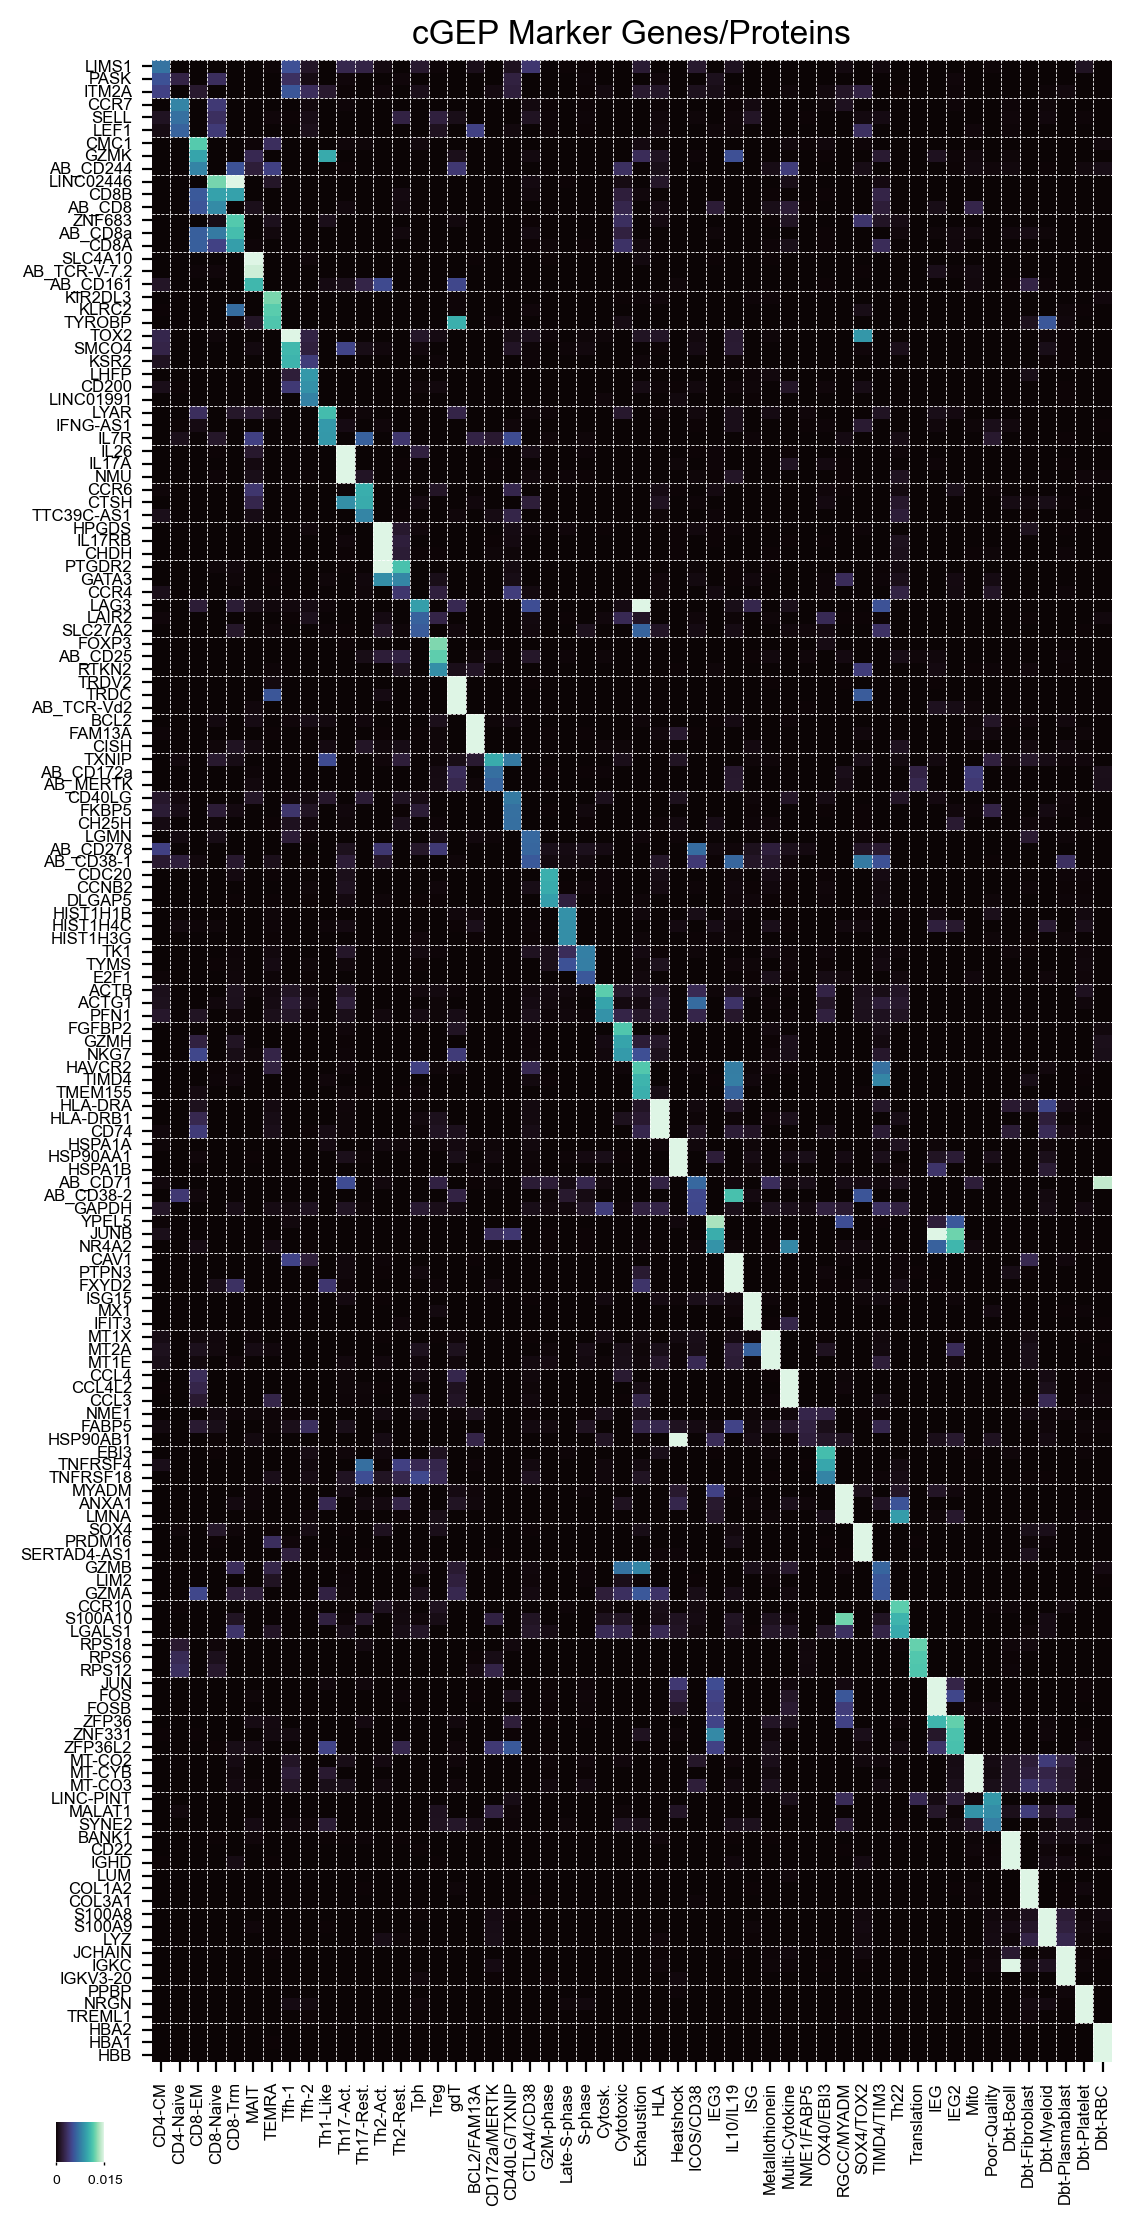

In [25]:
vmax = .015
(fig,ax) = plt.subplots(1,1, figsize=(6,11), dpi=200, gridspec_kw={'left':.15, 'bottom':.07, 'right':.95, 'top':.98})
cbar_ax = ax.inset_axes([-.1, -.05, 0.05, 0.02], transform=ax.transAxes, xticks=[0, vmax])

sns.heatmap(scores_ren_clean.T, ax=ax, vmin=0, vmax=vmax, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal", 'ticks':[0, vmax]}, cmap='mako')


cbar_ax.set_xticklabels(['0', '%.2f' % vmax], fontsize=6)



_ = ax.set_yticks(np.arange(len(full_gene_order))+.5)
_ = ax.set_yticklabels(scores_ren_clean.columns, fontsize=6.)
_ = ax.set_xticks(np.arange(len(geporder))+.5)
_ = ax.set_xticklabels(scores_ren_clean.index, fontsize=6)



for i in range(1, len(geporder)+1):
    ax.vlines(x=i, ymin=0, ymax=len(full_gene_order), linestyle='--', color='w', linewidth=.3)
    
for i in range(0, len(full_gene_order), 3):
    ax.hlines(y=i, xmin=0, xmax=len(geporder), linestyle='--', color='w', linewidth=.3)
    
ax.set_title('cGEP Marker Genes/Proteins', fontsize=12, y=1)

cbar_ax.set_xticklabels(['0', ' %.3f' % vmax])
cbar_ax.tick_params(labelsize=5, length=1, width=.5)

plt.savefig(os.path.join(figdir, 'MarkerGenes_AllcGEPS.pdf'))
plt.savefig(os.path.join(figdir, 'MarkerGenes_AllcGEPS.png'))

In [23]:
ind = gep_info['Filter'].isnull() & (gep_info['Class'] == 'Doublet Lineage')
doublets = list(gep_info.loc[ind, 'Short_Name'])
doublets

['Doublet-RBC',
 'Doublet-Platelet',
 'Doublet-Plasmablast',
 'Doublet-Bcell',
 'Doublet-Myeloid',
 'Doublet-Fibroblast']

In [24]:
for g in doublets:
    print(top_genes[g])

['HBA2', 'HBA1', 'HBB', 'HBM', 'AB_CD235ab', 'ALAS2', 'HBQ1', 'HBD', 'AHSP', 'CA1', 'MYL4', 'AB_CD71', 'SLC25A37', 'SLC4A1', 'SELENBP1', 'SNCA', 'PDZK1IP1', 'GYPA', 'AB_CD235a', 'HBG2']
['PPBP', 'NRGN', 'TREML1', 'SPARC', 'TUBB1', 'CAVIN2', 'PF4', 'GNG11', 'MYL9', 'GP9', 'ITGA2B', 'F13A1', 'MPIG6B', 'CMTM5', 'CLU', 'PF4V1', 'AB_CD41', 'PTGS1', 'GP1BB', 'PRKAR2B']
['JCHAIN', 'IGKC', 'IGKV3-20', 'IGHG1', 'IGHG3', 'IGKV1-5', 'IGKV4-1', 'IGHA1', 'IGHV3-30', 'IGHV3-23', 'IGLV2-14', 'MZB1', 'IGHV4-39', 'IGKV3-11', 'IGHG4', 'IGLV3-1', 'IGLC2', 'IGLV3-21', 'IGHV5-51', 'IGHV3-7']
['BANK1', 'CD22', 'IGHD', 'FCRL5', 'TCL1A', 'MEF2C', 'IGHM', 'ARHGAP24', 'IGKC', 'CD24', 'MS4A1', 'OSBPL10-AS1', 'FCRL1', 'CD19', 'COL19A1', 'FCRLA', 'MARCKS', 'CD79A', 'PAX5', 'BCL11A']
['S100A8', 'S100A9', 'LYZ', 'S100A12', 'VCAN', 'CST3', 'MNDA', 'FCN1', 'AB_CLEC12A', 'AB_CD33', 'AB_CD35', 'FCER1G', 'AB_Iglightchaink', 'IFI30', 'AB_CD11b-1', 'AB_CD32', 'AB_CD64', 'CD14', 'NEAT1', 'CSF3R']
['LUM', 'COL1A2', 'COL3A1',

In [26]:
top_genes['HLA']

['HLA-DRA',
 'HLA-DRB1',
 'CD74',
 'HLA-DQA1',
 'HLA-DQB1',
 'HLA-DPA1',
 'HLA-DRB5',
 'AB_HLA-DR',
 'HLA-DPB1',
 'HLA-DMA',
 'HLA-DQA2',
 'HLA-DMB',
 'MSC',
 'AB_CD95',
 'COTL1',
 'CDCA7',
 'GZMA',
 'ANXA5',
 'DUSP4',
 'CD70']

In [27]:
top_genes['Metallothionein']

['MT1X',
 'MT2A',
 'MT1E',
 'MT1G',
 'MT1H',
 'MT1F',
 'MT1M',
 'CCNA1',
 'SLC30A1',
 'GRHL3',
 'MT1A',
 'TRAJ4',
 'GNG4',
 'FAXC',
 'AB_CD71',
 'IGSF3',
 'CFAP58',
 'CAVIN3',
 'AB_HLA-DR',
 'H2AZ1']

In [28]:
top_genes['Cytoskeleton']

['ACTB',
 'ACTG1',
 'PFN1',
 'CFL1',
 'CORO1A',
 'MYL6',
 'ARPC1B',
 'CLIC1',
 'ARPC2',
 'TPM4',
 'TMSB10',
 'S100A4',
 'TMSB4X',
 'SH3BGRL3',
 'LCP1',
 'CNN2',
 'MYL12A',
 'COTL1',
 'RAC2',
 'ACTR3']